# GATHER DATA

In [470]:
import pandas as pd
import requests
import tweepy
import json
import time
import matplotlib.pyplot as plt
import numpy as np

Put archive in a Pandas DataFrame

In [11]:
archive = pd.read_csv('twitter-archive-enhanced.csv')


Download image predictions file from its URL using requests library

In [12]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

Load the downloaded file in a Pandas Dataframe

In [13]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

Create Twitter API object using tweepy

In [14]:

"""consumer_key = 
consumer_secret = 
access_token = 
access_secret =

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)"""

For each tweet in archive, gather additional data and store it in a txt file in a line

In [15]:
"""for id in archive['tweet_id']:
        try:
            start = time.time()
            print(counter)
            print('Tweet ID: ', id)
            counter += 1
            tweet = api.get_status(id, tweet_mode='extended')
            with open('tweet_json.txt', 'a') as file:
                json.dump(tweet._json, file)
                file.write('\n')
                end = time.time()
                print('Time taken: ', end-start)

        except Exception as e:
            start = time.time()
            print(counter)
            print('Tweet ID: ', id)
            counter += 1
            end = time.time()
            print('Time taken', end-start)
            continue"""

"for id in archive['tweet_id']:\n        try:\n            start = time.time()\n            print(counter)\n            print('Tweet ID: ', id)\n            counter += 1\n            tweet = api.get_status(id, tweet_mode='extended')\n            with open('tweet_json.txt', 'a') as file:\n                json.dump(tweet._json, file)\n                file.write('\n')\n                end = time.time()\n                print('Time taken: ', end-start)\n\n        except Exception as e:\n            start = time.time()\n            print(counter)\n            print('Tweet ID: ', id)\n            counter += 1\n            end = time.time()\n            print('Time taken', end-start)\n            continue"

For each line in the txt file, get the data as a Python dictionary, and append it to a list

In [16]:
tweet_list = []
with open('tweet_json.txt', 'r') as f:
    for line in f:
        tweet_list.append(json.loads(line))
        

Use the list of dictionaries to create a Pandas DataFrame

In [17]:
tweet_data = pd.DataFrame(tweet_list)

# ASSESS DATA

In [18]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [24]:
archive.iloc[5, 5]

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

In [25]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [32]:
archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Buddah       1
Pinot        1
Barney       1
Bobbay       1
Darrel       1
Name: name, Length: 957, dtype: int64

In [35]:
archive.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [36]:
archive.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [58]:
archive.query('rating_numerator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [61]:
archive.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [73]:
archive.query('rating_numerator == 1')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


In [71]:
archive.iloc[1016, 5]

"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"

In [74]:
archive.iloc[315, 5]

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [75]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [76]:
archive.query('rating_numerator == 420')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [77]:
archive.iloc[188, 5]

'@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research'

In [78]:
archive.iloc[2074, 5]

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [79]:
archive.query('rating_numerator == 75')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [80]:
archive.iloc[695, 5]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [82]:
archive.query('rating_numerator == 80')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [83]:
archive.iloc[1254, 5]

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [84]:
archive.query('rating_numerator == 165')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [85]:
archive.iloc[902 ,5]

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

In [88]:
archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [89]:
archive.iloc[979, 5]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [107]:
archive.query('rating_numerator == 960')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [108]:
archive.iloc[313, 5]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [38]:
archive['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [39]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [40]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
tweet_data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2004,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2005,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2006,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [42]:
tweet_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [44]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 32 columns):
created_at                       2008 non-null object
id                               2008 non-null int64
id_str                           2008 non-null object
full_text                        2008 non-null object
truncated                        2008 non-null bool
display_text_range               2008 non-null object
entities                         2008 non-null object
extended_entities                1756 non-null object
source                           2008 non-null object
in_reply_to_status_id            70 non-null float64
in_reply_to_status_id_str        70 non-null object
in_reply_to_user_id              70 non-null float64
in_reply_to_user_id_str          70 non-null object
in_reply_to_screen_name          70 non-null object
user                             2008 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [45]:
tweet_data['user']

0       {'id': 4196983835, 'id_str': '4196983835', 'na...
1       {'id': 4196983835, 'id_str': '4196983835', 'na...
2       {'id': 4196983835, 'id_str': '4196983835', 'na...
3       {'id': 4196983835, 'id_str': '4196983835', 'na...
4       {'id': 4196983835, 'id_str': '4196983835', 'na...
                              ...                        
2003    {'id': 4196983835, 'id_str': '4196983835', 'na...
2004    {'id': 4196983835, 'id_str': '4196983835', 'na...
2005    {'id': 4196983835, 'id_str': '4196983835', 'na...
2006    {'id': 4196983835, 'id_str': '4196983835', 'na...
2007    {'id': 4196983835, 'id_str': '4196983835', 'na...
Name: user, Length: 2008, dtype: object

In [46]:
tweet_data['lang'].value_counts()

en     1991
und       7
in        3
nl        3
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

In [47]:
tweet_data.query('lang == "und"')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
50,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,886053434075471873,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN
297,Sat Mar 04 22:12:52 +0000 2017,838150277551247360,838150277551247360,@markhoppus 182/10,False,"[12, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.381455e+17,...,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN,NaN
412,Mon Jan 23 00:56:15 +0000 2017,823333489516937216,823333489516937216,@HistoryInPics 13/10,False,"[15, 20]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.233264e+17,...,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN,NaN
621,Tue Nov 08 23:01:49 +0000 2016,796125600683540480,796125600683540480,#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,False,"[0, 41]","{'hashtags': [{'text': 'ImWithThor', 'indices'...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,und,NaN,7.961237e+17,796123679771897856,"{'url': 'https://t.co/a18mzkhTf6', 'expanded':...",{'created_at': 'Tue Nov 08 22:54:11 +0000 2016...
955,Sat Jun 04 00:32:32 +0000 2016,738891149612572673,738891149612572673,@mount_alex3 13/10,False,"[13, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.384119e+17,...,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN,NaN
1398,Fri Jan 22 18:49:36 +0000 2016,690607260360429569,690607260360429569,12/10 @LightningHoltt,False,"[0, 21]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.903413e+17,...,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN,NaN
1788,Tue Dec 08 20:53:11 +0000 2015,674330906434379776,674330906434379776,13/10\n@ABC7,False,"[0, 11]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.658147e+17,...,False,False,NaN,NaN,und,NaN,NaN,NaN,NaN,NaN


In [48]:
tweet_data.query('lang == "in"')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
177,Thu May 04 17:01:34 +0000 2017,860177593139703809,860177593139703809,RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,NaN,in,{'created_at': 'Fri Aug 05 21:19:27 +0000 2016...,NaN,NaN,NaN,NaN
868,Fri Aug 05 21:19:27 +0000 2016,761672994376806400,761672994376806400,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 761672828462718981, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,in,NaN,NaN,NaN,NaN,NaN
1541,Thu Dec 31 22:57:47 +0000 2015,682697186228989953,682697186228989953,NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...,False,"[0, 67]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 682697175697088514, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,in,NaN,NaN,NaN,NaN,NaN


In [49]:
tweet_data.query('lang == "nl"')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1534,Sat Jan 02 01:33:43 +0000 2016,683098815881154561,683098815881154561,aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,False,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 683098811808518144, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,nl,NaN,NaN,NaN,NaN,NaN
1760,Thu Dec 10 03:19:24 +0000 2015,674790488185167872,674790488185167872,ER... MER... GERD 13/10 https://t.co/L1puJISV1a,False,"[0, 47]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674790484284436480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,nl,NaN,NaN,NaN,NaN,NaN
1930,Thu Nov 19 20:14:03 +0000 2015,667435689202614272,667435689202614272,Ermergerd 12/10 https://t.co/PQni2sjPsm,False,"[0, 39]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667435686304342017, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,nl,NaN,NaN,NaN,NaN,NaN


In [50]:
tweet_data.query('lang  in ["es", "tl", "ro", "et"]')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1220,Tue Mar 01 02:19:31 +0000 2016,704491224099647488,704491224099647488,13/10 hero af\n@ABC,False,"[0, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",7.044857e+17,...,False,False,NaN,NaN,es,NaN,NaN,NaN,NaN,NaN
1841,Tue Nov 24 01:42:25 +0000 2015,668967877119254528,668967877119254528,12/10 good shit Bubka\n@wane15,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.689207e+17,...,False,False,NaN,NaN,tl,NaN,NaN,NaN,NaN,NaN
1912,Fri Nov 20 03:51:47 +0000 2015,667550882905632768,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548406944960512, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,False,False,False,False,ro,{'created_at': 'Fri Nov 20 03:41:59 +0000 2015...,NaN,NaN,NaN,NaN
1936,Thu Nov 19 04:05:59 +0000 2015,667192066997374976,667192066997374976,*takes several long deep breaths* omg omg oMG ...,False,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667192061259620352, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,et,NaN,NaN,NaN,NaN,NaN


In [51]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [53]:
archive.query('in_reply_to_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [56]:
archive.query('in_reply_to_status_id != "NaN" and name != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None


In [57]:
archive.query('name == "Tessa"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None


In [54]:
archive.query('retweeted_status_id != "Nan"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [55]:
archive.query('name == "Canela"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [93]:
archive.duplicated().sum()

0

In [94]:
archive['name'].isnull().sum()

0

## Tidiness Issues
1. Three tables instead of one for an observational unit
2. Dog type as different columns


## Data Quality Issues

1. some records are replies instead of tweets (invalid data) - Only one of the replies consists of relevant data (Tessa)
2. some records are just retweets (invalid data)
3. Some records have things other than dogs as their subject (invalid data)
4. Non-descriptive column name: p1
5. name = 'a' (inaccurate data)
6. timestamp string instead of datetime (inaccurate data)
7. dog type string instead of category type (inaccurate data)
8. rating_numerator is int even though some values are decimals (inaccurate data)
9. rating_numerator = 27 is actually 11.27 (inaccurate data)
10. rating_numerator = 75 is actually 9.75 (inaccurate data)



# CLEAN DATA

In [109]:
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

In [111]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [112]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

First drop unwanted columns 

In [113]:
archive_clean.drop(columns=['in_reply_to_user_id', 'source', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], inplace=True)

In [114]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,None,None,None,None


In [115]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [116]:
image_predictions_clean.drop(columns=['jpg_url', 'img_num', 'p1_conf', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

In [117]:
image_predictions_clean.head()

,tweet_id,p1,p1_dog
0,666020888022790149,Welsh_springer_spaniel,True
1,666029285002620928,redbone,True
2,666033412701032449,German_shepherd,True
3,666044226329800704,Rhodesian_ridgeback,True
4,666049248165822465,miniature_pinscher,True


In [118]:
tweet_data_clean.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [119]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 32 columns):
created_at                       2008 non-null object
id                               2008 non-null int64
id_str                           2008 non-null object
full_text                        2008 non-null object
truncated                        2008 non-null bool
display_text_range               2008 non-null object
entities                         2008 non-null object
extended_entities                1756 non-null object
source                           2008 non-null object
in_reply_to_status_id            70 non-null float64
in_reply_to_status_id_str        70 non-null object
in_reply_to_user_id              70 non-null float64
in_reply_to_user_id_str          70 non-null object
in_reply_to_screen_name          70 non-null object
user                             2008 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [122]:
tweet_data_clean = tweet_data.iloc[:, [1, 20, 21]].copy()

In [123]:
tweet_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [124]:
tweet_data_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,7894,36993
1,892177421306343426,5865,31845
2,891815181378084864,3870,23989
3,891689557279858688,8054,40325
4,891327558926688256,8729,38540


## Issue: Three tables instead of one for an observational unit

### Define

Use merge() to join the three tables on tweet_id

### Code

In [125]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,None,None,None,None


In [126]:
image_predictions_clean.head()

,tweet_id,p1,p1_dog
0,666020888022790149,Welsh_springer_spaniel,True
1,666029285002620928,redbone,True
2,666033412701032449,German_shepherd,True
3,666044226329800704,Rhodesian_ridgeback,True
4,666049248165822465,miniature_pinscher,True


In [128]:
archive_clean = archive_clean.merge(image_predictions_clean, how='left')

In [131]:
archive_clean.tail()

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_dog
2351,666049248165822465,NaN,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,NaN,5,10,None,None,None,None,None,miniature_pinscher,True
2352,666044226329800704,NaN,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,NaN,6,10,a,None,None,None,None,Rhodesian_ridgeback,True
2353,666033412701032449,NaN,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,NaN,9,10,a,None,None,None,None,German_shepherd,True
2354,666029285002620928,NaN,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,NaN,7,10,a,None,None,None,None,redbone,True
2355,666020888022790149,NaN,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,NaN,8,10,None,None,None,None,None,Welsh_springer_spaniel,True


In [132]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 3 columns):
id                2008 non-null int64
retweet_count     2008 non-null int64
favorite_count    2008 non-null int64
dtypes: int64(3)
memory usage: 47.2 KB


Change column name from id to tweet_id to merge with archive_clean

In [134]:
tweet_data_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [135]:
tweet_data_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7894,36993
1,892177421306343426,5865,31845
2,891815181378084864,3870,23989
3,891689557279858688,8054,40325
4,891327558926688256,8729,38540


In [138]:
archive_clean = archive_clean.merge(tweet_data_clean, how='left', on='tweet_id')

### Test

In [139]:
archive_clean

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_dog,retweet_count,favorite_count
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None,orange,False,7894.0,36993.0
1,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None,orange,False,7894.0,36993.0
2,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None,Chihuahua,True,5865.0,31845.0
3,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None,Chihuahua,True,5865.0,31845.0
4,891815181378084864,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,None,None,None,None,Chihuahua,True,3870.0,23989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,666049248165822465,NaN,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,NaN,5,10,None,None,None,None,None,miniature_pinscher,True,41.0,100.0
2371,666044226329800704,NaN,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,NaN,6,10,a,None,None,None,None,Rhodesian_ridgeback,True,135.0,279.0
2372,666033412701032449,NaN,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,NaN,9,10,a,None,None,None,None,German_shepherd,True,43.0,118.0
2373,666029285002620928,NaN,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,NaN,7,10,a,None,None,None,None,redbone,True,45.0,122.0


## Issue: Dog type as different columns

### Define

Use melt() to create column for dog type

### Code

In [140]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,p1_dog,retweet_count,favorite_count
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None,orange,False,7894.0,36993.0
1,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None,orange,False,7894.0,36993.0
2,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None,Chihuahua,True,5865.0,31845.0
3,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None,Chihuahua,True,5865.0,31845.0
4,891815181378084864,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,None,None,None,None,Chihuahua,True,3870.0,23989.0


In [143]:
archive_c = archive_clean.melt(id_vars=['tweet_id', 'in_reply_to_status_id', 'timestamp', 'text', 'retweeted_status_id', 'rating_numerator', 'rating_denominator', 'name', 'p1', 'p1_dog', 'retweet_count', 'favorite_count'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='dog_type', value_name='actual_dog_type')

In [144]:
archive_c

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,p1,p1_dog,retweet_count,favorite_count,dog_type,actual_dog_type
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,orange,False,7894.0,36993.0,doggo,None
1,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,orange,False,7894.0,36993.0,doggo,None
2,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,Chihuahua,True,5865.0,31845.0,doggo,None
3,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,Chihuahua,True,5865.0,31845.0,doggo,None
4,891815181378084864,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,Chihuahua,True,3870.0,23989.0,doggo,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,666049248165822465,NaN,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,NaN,5,10,None,miniature_pinscher,True,41.0,100.0,puppo,None
9496,666044226329800704,NaN,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,NaN,6,10,a,Rhodesian_ridgeback,True,135.0,279.0,puppo,None
9497,666033412701032449,NaN,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,NaN,9,10,a,German_shepherd,True,43.0,118.0,puppo,None
9498,666029285002620928,NaN,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,NaN,7,10,a,redbone,True,45.0,122.0,puppo,None


In [145]:
archive_c.drop(columns='dog_type', inplace=True)

In [146]:
archive_c

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,p1,p1_dog,retweet_count,favorite_count,actual_dog_type
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,orange,False,7894.0,36993.0,None
1,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,orange,False,7894.0,36993.0,None
2,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,Chihuahua,True,5865.0,31845.0,None
3,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,Chihuahua,True,5865.0,31845.0,None
4,891815181378084864,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,Chihuahua,True,3870.0,23989.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,666049248165822465,NaN,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,NaN,5,10,None,miniature_pinscher,True,41.0,100.0,None
9496,666044226329800704,NaN,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,NaN,6,10,a,Rhodesian_ridgeback,True,135.0,279.0,None
9497,666033412701032449,NaN,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,NaN,9,10,a,German_shepherd,True,43.0,118.0,None
9498,666029285002620928,NaN,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,NaN,7,10,a,redbone,True,45.0,122.0,None


In [147]:
archive_c.duplicated()

0       False
1        True
2       False
3        True
4       False
        ...  
9495     True
9496     True
9497     True
9498     True
9499     True
Length: 9500, dtype: bool

In [149]:
archive_c.duplicated().sum()

6746

In [150]:
archive_c.drop_duplicates(inplace=True)

In [151]:
archive_c

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,p1,p1_dog,retweet_count,favorite_count,actual_dog_type
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,orange,False,7894.0,36993.0,None
2,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,Chihuahua,True,5865.0,31845.0,None
4,891815181378084864,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,Chihuahua,True,3870.0,23989.0,None
6,891689557279858688,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,paper_towel,False,8054.0,40325.0,None
8,891327558926688256,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,basset,True,8729.0,38540.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,752519690950500352,NaN,2016-07-11 15:07:30 +0000,Hopefully this puppo on a swing will help get ...,NaN,11,10,None,swing,False,NaN,NaN,puppo
8105,751132876104687617,NaN,2016-07-07 19:16:47 +0000,This is Cooper. He's just so damn happy. 10/10...,NaN,10,10,Cooper,Labrador_retriever,True,NaN,NaN,puppo
8179,744995568523612160,NaN,2016-06-20 20:49:19 +0000,This is Abby. She got her face stuck in a glas...,NaN,9,10,Abby,Old_English_sheepdog,True,635.0,3031.0,puppo
8192,743253157753532416,NaN,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,NaN,10,10,Kilo,malamute,True,1251.0,4318.0,puppo


In [153]:
archive_clean = archive_c.copy()

### Test

In [155]:
archive_clean

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,p1,p1_dog,retweet_count,favorite_count,actual_dog_type
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,orange,False,7894.0,36993.0,None
2,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,Chihuahua,True,5865.0,31845.0,None
4,891815181378084864,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,Chihuahua,True,3870.0,23989.0,None
6,891689557279858688,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,paper_towel,False,8054.0,40325.0,None
8,891327558926688256,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,basset,True,8729.0,38540.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,752519690950500352,NaN,2016-07-11 15:07:30 +0000,Hopefully this puppo on a swing will help get ...,NaN,11,10,None,swing,False,NaN,NaN,puppo
8105,751132876104687617,NaN,2016-07-07 19:16:47 +0000,This is Cooper. He's just so damn happy. 10/10...,NaN,10,10,Cooper,Labrador_retriever,True,NaN,NaN,puppo
8179,744995568523612160,NaN,2016-06-20 20:49:19 +0000,This is Abby. She got her face stuck in a glas...,NaN,9,10,Abby,Old_English_sheepdog,True,635.0,3031.0,puppo
8192,743253157753532416,NaN,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,NaN,10,10,Kilo,malamute,True,1251.0,4318.0,puppo


## Issue: some records are replies instead of tweets (invalid data) - Only one of the replies consists of relevant data (Tessa)

### Define

Remove all records with non-null in_reply_to_status_id except where name is Tessa

### Code

In [160]:
archive_clean = archive_clean.query('in_reply_to_status_id == "NaN" or name == "Tessa"')

### Test

In [161]:
archive_clean

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,p1,p1_dog,retweet_count,favorite_count,actual_dog_type
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,orange,False,7894.0,36993.0,None
2,892177421306343426,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,Chihuahua,True,5865.0,31845.0,None
4,891815181378084864,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,Chihuahua,True,3870.0,23989.0,None
6,891689557279858688,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,paper_towel,False,8054.0,40325.0,None
8,891327558926688256,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,basset,True,8729.0,38540.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,752519690950500352,NaN,2016-07-11 15:07:30 +0000,Hopefully this puppo on a swing will help get ...,NaN,11,10,None,swing,False,NaN,NaN,puppo
8105,751132876104687617,NaN,2016-07-07 19:16:47 +0000,This is Cooper. He's just so damn happy. 10/10...,NaN,10,10,Cooper,Labrador_retriever,True,NaN,NaN,puppo
8179,744995568523612160,NaN,2016-06-20 20:49:19 +0000,This is Abby. She got her face stuck in a glas...,NaN,9,10,Abby,Old_English_sheepdog,True,635.0,3031.0,puppo
8192,743253157753532416,NaN,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,NaN,10,10,Kilo,malamute,True,1251.0,4318.0,puppo


In [162]:
archive_clean.query('name == "Tessa"')

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,p1,p1_dog,retweet_count,favorite_count,actual_dog_type
2188,669353438988365824,6.678065e+17,2015-11-25 03:14:30 +0000,This is Tessa. She is also very pleased after ...,NaN,10,10,Tessa,teddy,False,259.0,628.0,None


In [163]:
archive_clean.query('in_reply_to_status_id != "Nan"')

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,p1,p1_dog,retweet_count,favorite_count,actual_dog_type
2188,669353438988365824,6.678065e+17,2015-11-25 03:14:30 +0000,This is Tessa. She is also very pleased after ...,NaN,10,10,Tessa,teddy,False,259.0,628.0,None


## Issue: some records are just retweets (invalid data)

### Define

Remove all records where the retweeted_status_id is not null

### Code

In [166]:
archive_clean = archive_clean.query('retweeted_status_id == "NaN"')

### Test

In [169]:
archive_clean.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,p1,p1_dog,retweet_count,favorite_count,actual_dog_type


Now the in_reply_to_status_id and retweeted_status_id columns are no longer needed.

In [170]:
archive_clean.drop(columns=['in_reply_to_status_id', 'retweeted_status_id'], inplace=True)

C:\Users\Deepanshu\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [171]:
archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,p1,p1_dog,retweet_count,favorite_count,actual_dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,orange,False,7894.0,36993.0,None
2,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,Chihuahua,True,5865.0,31845.0,None
4,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Chihuahua,True,3870.0,23989.0,None
6,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,paper_towel,False,8054.0,40325.0,None
8,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,basset,True,8729.0,38540.0,None
...,...,...,...,...,...,...,...,...,...,...,...
8091,752519690950500352,2016-07-11 15:07:30 +0000,Hopefully this puppo on a swing will help get ...,11,10,None,swing,False,NaN,NaN,puppo
8105,751132876104687617,2016-07-07 19:16:47 +0000,This is Cooper. He's just so damn happy. 10/10...,10,10,Cooper,Labrador_retriever,True,NaN,NaN,puppo
8179,744995568523612160,2016-06-20 20:49:19 +0000,This is Abby. She got her face stuck in a glas...,9,10,Abby,Old_English_sheepdog,True,635.0,3031.0,puppo
8192,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,malamute,True,1251.0,4318.0,puppo


## Issue: Some records have things other than dogs as their subject (invalid data)

### Define

Remove records where p1_dog value is false based on our predictions

### Code

In [174]:
archive_clean = archive_clean.query('p1_dog == True')

### Test

In [176]:
archive_clean.query('p1_dog == False')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,p1,p1_dog,retweet_count,favorite_count,actual_dog_type


In [180]:
archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,p1,retweet_count,favorite_count,actual_dog_type
2,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,Chihuahua,5865.0,31845.0,None
4,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Chihuahua,3870.0,23989.0,None
8,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,basset,8729.0,38540.0,None
10,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,Chesapeake_Bay_retriever,2899.0,19372.0,None
12,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,Appenzeller,1919.0,11298.0,None
...,...,...,...,...,...,...,...,...,...,...
8066,756275833623502848,2016-07-21 23:53:04 +0000,When ur older siblings get to play in the deep...,10,10,None,Airedale,NaN,NaN,puppo
8105,751132876104687617,2016-07-07 19:16:47 +0000,This is Cooper. He's just so damn happy. 10/10...,10,10,Cooper,Labrador_retriever,NaN,NaN,puppo
8179,744995568523612160,2016-06-20 20:49:19 +0000,This is Abby. She got her face stuck in a glas...,9,10,Abby,Old_English_sheepdog,635.0,3031.0,puppo
8192,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,malamute,1251.0,4318.0,puppo


Now, p1_dog column is no longer needed.

In [177]:
archive_clean.drop(columns=['p1_dog'], inplace=True)

## Issue: Non-descriptive column name: p1

### Define

Change p1 to predicted_breed

### Code

In [183]:
archive_clean.rename(columns={'p1': 'predicted_breed', 'actual_dog_type': 'dog_type'}, inplace=True)

C:\Users\Deepanshu\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


### Test

In [184]:
archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,predicted_breed,retweet_count,favorite_count,dog_type
2,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,Chihuahua,5865.0,31845.0,None
4,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Chihuahua,3870.0,23989.0,None
8,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,basset,8729.0,38540.0,None
10,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,Chesapeake_Bay_retriever,2899.0,19372.0,None
12,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,Appenzeller,1919.0,11298.0,None


In [185]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1703 entries, 2 to 8227
Data columns (total 10 columns):
tweet_id              1703 non-null int64
timestamp             1703 non-null object
text                  1703 non-null object
rating_numerator      1703 non-null int64
rating_denominator    1703 non-null int64
name                  1703 non-null object
predicted_breed       1703 non-null object
retweet_count         1455 non-null float64
favorite_count        1455 non-null float64
dog_type              1703 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 146.4+ KB


## Issue: name = 'a' (inaccurate data)

### Define

From text, extract the correct names 

### Code

In [325]:
archive_clean.reset_index(drop=True, inplace=True)

In [339]:
archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,predicted_breed,retweet_count,favorite_count,dog_type
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,Chihuahua,5865.0,31845.0,None
1,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Chihuahua,3870.0,23989.0,None
2,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,basset,8729.0,38540.0,None
3,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,Chesapeake_Bay_retriever,2899.0,19372.0,None
4,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,Appenzeller,1919.0,11298.0,None
...,...,...,...,...,...,...,...,...,...,...
1698,756275833623502848,2016-07-21 23:53:04 +0000,When ur older siblings get to play in the deep...,10,10,None,Airedale,NaN,NaN,puppo
1699,751132876104687617,2016-07-07 19:16:47 +0000,This is Cooper. He's just so damn happy. 10/10...,10,10,Cooper,Labrador_retriever,NaN,NaN,puppo
1700,744995568523612160,2016-06-20 20:49:19 +0000,This is Abby. She got her face stuck in a glas...,9,10,Abby,Old_English_sheepdog,635.0,3031.0,puppo
1701,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,malamute,1251.0,4318.0,puppo


In [340]:
archive_clean.query('name == "a"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,predicted_breed,retweet_count,favorite_count,dog_type
47,881536004380872706,2017-07-02 15:32:16 +0000,Here is a pupper approaching maximum borkdrive...,14,10,a,Samoyed,14930.0,47327.0,None
469,772581559778025472,2016-09-04 23:46:12 +0000,Guys this is getting so out of hand. We only r...,10,10,a,Newfoundland,1754.0,6724.0,None
595,747885874273214464,2016-06-28 20:14:22 +0000,This is a mighty rare blue-tailed hammer sherk...,8,10,a,kuvasz,NaN,NaN,None
597,747816857231626240,2016-06-28 15:40:07 +0000,Viewer discretion is advised. This is a terrib...,4,10,a,Pembroke,NaN,NaN,None
603,746872823977771008,2016-06-26 01:08:52 +0000,This is a carrot. We only rate dogs. Please on...,11,10,a,Pembroke,NaN,NaN,None
622,743222593470234624,2016-06-15 23:24:09 +0000,This is a very rare Great Alaskan Bush Pupper....,12,10,a,kuvasz,1939.0,6339.0,None
724,717537687239008257,2016-04-06 02:21:30 +0000,People please. This is a Deadly Mediterranean ...,11,10,a,golden_retriever,1876.0,5862.0,None
734,715733265223708672,2016-04-01 02:51:22 +0000,This is a taco. We only rate dogs. Please only...,10,10,a,Dandie_Dinmont,1712.0,4743.0,None
823,704859558691414016,2016-03-02 02:43:09 +0000,Here is a heartbreaking scene of an incredible...,10,10,a,pug,552.0,2291.0,None
828,704054845121142784,2016-02-28 21:25:30 +0000,Here is a whole flock of puppers. 60/50 I'll ...,60,50,a,Great_Pyrenees,930.0,2984.0,None


In [346]:
archive_clean['extract'] = archive_clean['text'].str.extract(r'(named [A-Za-z\(\)\s]+\s?\.)')

In [347]:
archive_clean.query('name == "a"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,predicted_breed,retweet_count,favorite_count,dog_type,extract
47,881536004380872706,2017-07-02 15:32:16 +0000,Here is a pupper approaching maximum borkdrive...,14,10,a,Samoyed,14930.0,47327.0,None,NaN
469,772581559778025472,2016-09-04 23:46:12 +0000,Guys this is getting so out of hand. We only r...,10,10,a,Newfoundland,1754.0,6724.0,None,NaN
595,747885874273214464,2016-06-28 20:14:22 +0000,This is a mighty rare blue-tailed hammer sherk...,8,10,a,kuvasz,NaN,NaN,None,NaN
597,747816857231626240,2016-06-28 15:40:07 +0000,Viewer discretion is advised. This is a terrib...,4,10,a,Pembroke,NaN,NaN,None,NaN
603,746872823977771008,2016-06-26 01:08:52 +0000,This is a carrot. We only rate dogs. Please on...,11,10,a,Pembroke,NaN,NaN,None,NaN
622,743222593470234624,2016-06-15 23:24:09 +0000,This is a very rare Great Alaskan Bush Pupper....,12,10,a,kuvasz,1939.0,6339.0,None,NaN
724,717537687239008257,2016-04-06 02:21:30 +0000,People please. This is a Deadly Mediterranean ...,11,10,a,golden_retriever,1876.0,5862.0,None,NaN
734,715733265223708672,2016-04-01 02:51:22 +0000,This is a taco. We only rate dogs. Please only...,10,10,a,Dandie_Dinmont,1712.0,4743.0,None,NaN
823,704859558691414016,2016-03-02 02:43:09 +0000,Here is a heartbreaking scene of an incredible...,10,10,a,pug,552.0,2291.0,None,NaN
828,704054845121142784,2016-02-28 21:25:30 +0000,Here is a whole flock of puppers. 60/50 I'll ...,60,50,a,Great_Pyrenees,930.0,2984.0,None,NaN


In [349]:
archive_clean['extract'] = archive_clean['extract'].str[6:-1]

In [350]:
archive_clean.query('name == "a"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,predicted_breed,retweet_count,favorite_count,dog_type,extract
47,881536004380872706,2017-07-02 15:32:16 +0000,Here is a pupper approaching maximum borkdrive...,14,10,a,Samoyed,14930.0,47327.0,None,NaN
469,772581559778025472,2016-09-04 23:46:12 +0000,Guys this is getting so out of hand. We only r...,10,10,a,Newfoundland,1754.0,6724.0,None,NaN
595,747885874273214464,2016-06-28 20:14:22 +0000,This is a mighty rare blue-tailed hammer sherk...,8,10,a,kuvasz,NaN,NaN,None,NaN
597,747816857231626240,2016-06-28 15:40:07 +0000,Viewer discretion is advised. This is a terrib...,4,10,a,Pembroke,NaN,NaN,None,NaN
603,746872823977771008,2016-06-26 01:08:52 +0000,This is a carrot. We only rate dogs. Please on...,11,10,a,Pembroke,NaN,NaN,None,NaN
622,743222593470234624,2016-06-15 23:24:09 +0000,This is a very rare Great Alaskan Bush Pupper....,12,10,a,kuvasz,1939.0,6339.0,None,NaN
724,717537687239008257,2016-04-06 02:21:30 +0000,People please. This is a Deadly Mediterranean ...,11,10,a,golden_retriever,1876.0,5862.0,None,NaN
734,715733265223708672,2016-04-01 02:51:22 +0000,This is a taco. We only rate dogs. Please only...,10,10,a,Dandie_Dinmont,1712.0,4743.0,None,NaN
823,704859558691414016,2016-03-02 02:43:09 +0000,Here is a heartbreaking scene of an incredible...,10,10,a,pug,552.0,2291.0,None,NaN
828,704054845121142784,2016-02-28 21:25:30 +0000,Here is a whole flock of puppers. 60/50 I'll ...,60,50,a,Great_Pyrenees,930.0,2984.0,None,NaN


In [352]:
archive_clean['extract'].value_counts()

Zeus         1
Chuk         1
Klint        1
Jessiga      1
Leroi        1
Octaviath    1
Wylie        1
Guss         1
Tickles      1
Johm         1
Alfonso      1
Rufus        1
Hemry        1
Kohl         1
Alfredo      1
Cheryl       1
Berta        1
Name: extract, dtype: int64

In [354]:
archive_clean.query('extract in ["Zeus", "Chuk", "Klint", "Jessiga", "Leroi", "Octaviath", "Wylie", "Guss", "Tickles", "Johm", "Alfonso", "Rufus", "Hemry", "Kohl", "Alfredo", "Cheryl", "Berta"]')['extract']

1151        Wylie
1280        Rufus
1317        Hemry
1335      Alfredo
1340         Zeus
1353        Leroi
1362        Berta
1371         Chuk
1376         Guss
1382      Alfonso
1388       Cheryl
1392      Jessiga
1396        Klint
1400      Tickles
1404         Kohl
1431    Octaviath
1433         Johm
Name: extract, dtype: object

In [361]:
archive_clean.iat[1151, 5] = 'Wylie'

In [362]:
archive_clean.iloc[1151]

tweet_id                                             675706639471788032
timestamp                                     2015-12-12 15:59:51 +0000
text                  This is a Sizzlin Menorah spaniel from Brookly...
rating_numerator                                                     10
rating_denominator                                                   10
name                                                              Wylie
predicted_breed                                        English_springer
retweet_count                                                        97
favorite_count                                                      641
dog_type                                                           None
extract                                                           Wylie
Name: 1151, dtype: object

In [363]:
archive_clean.iat[1280, 5] = 'Rufus'

In [364]:
archive_clean.iat[1317, 5] = 'Henry'

In [365]:
archive_clean.iat[1335, 5] = 'Alfredo'

In [366]:
archive_clean.iat[1340, 5] = 'Zeus'

In [367]:
archive_clean.iat[1353, 5] = 'Leroi'

In [368]:
archive_clean.iat[1362, 5] = 'Berta'

In [369]:
archive_clean.iat[1371, 5] = 'Chuk'

In [370]:
archive_clean.iat[1376, 5] = 'Guss'

In [371]:
archive_clean.iat[1382, 5] = 'Alfonso'

In [372]:
archive_clean.iat[1388, 5] = 'Cheryl'

In [373]:
archive_clean.iat[1392, 5] = 'Jessica'

In [374]:
archive_clean.iat[1396, 5] = 'Klint'

In [375]:
archive_clean.iat[1400, 5] = 'Tickles'

In [376]:
archive_clean.iat[1404, 5] = 'Kohl'

In [377]:
archive_clean.iat[1431, 5] = 'Octaviath'

In [378]:
archive_clean.iat[1433, 5] = 'John'

### Test

In [380]:
archive_clean.query('extract in ["Zeus", "Chuk", "Klint", "Jessiga", "Leroi", "Octaviath", "Wylie", "Guss", "Tickles", "Johm", "Alfonso", "Rufus", "Hemry", "Kohl", "Alfredo", "Cheryl", "Berta"]')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,predicted_breed,retweet_count,favorite_count,dog_type,extract
1151,675706639471788032,2015-12-12 15:59:51 +0000,This is a Sizzlin Menorah spaniel from Brookly...,10,10,Wylie,English_springer,97.0,641.0,None,Wylie
1280,671147085991960577,2015-11-30 02:01:49 +0000,This is a Helvetica Listerine named Rufus. Thi...,9,10,Rufus,Yorkshire_terrier,NaN,NaN,None,Rufus
1317,670303360680108032,2015-11-27 18:09:09 +0000,This is a Speckled Cauliflower Yosemite named ...,9,10,Henry,Shetland_sheepdog,NaN,NaN,None,Hemry
1335,669564461267722241,2015-11-25 17:13:02 +0000,This is a Coriander Baton Rouge named Alfredo....,10,10,Alfredo,toy_poodle,121.0,378.0,None,Alfredo
1340,669363888236994561,2015-11-25 03:56:01 +0000,Here we have a Gingivitis Pumpernickel named Z...,10,10,Zeus,golden_retriever,222.0,612.0,None,Zeus
1353,668955713004314625,2015-11-24 00:54:05 +0000,This is a Slovakian Helter Skelter Feta named ...,10,10,Leroi,cocker_spaniel,71.0,273.0,None,Leroi
1362,668636665813057536,2015-11-23 03:46:18 +0000,This is an Irish Rigatoni terrier named Berta....,10,10,Berta,komondor,481.0,1028.0,None,Berta
1371,668507509523615744,2015-11-22 19:13:05 +0000,This is a Birmingham Quagmire named Chuk. Love...,10,10,Chuk,basenji,101.0,318.0,None,Chuk
1376,668268907921326080,2015-11-22 03:24:58 +0000,Here we have an Azerbaijani Buttermilk named G...,10,10,Guss,Pembroke,232.0,546.0,None,Guss
1382,668171859951755264,2015-11-21 20:59:20 +0000,This is a Trans Siberian Kellogg named Alfonso...,7,10,Alfonso,Chihuahua,189.0,478.0,None,Alfonso


## Issue: timestamp string instead of datetime (inaccurate data)

### Define
Use to_datetime to convert dtype to datetime

### Code

In [381]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 11 columns):
tweet_id              1703 non-null int64
timestamp             1703 non-null object
text                  1703 non-null object
rating_numerator      1703 non-null int64
rating_denominator    1703 non-null int64
name                  1703 non-null object
predicted_breed       1703 non-null object
retweet_count         1455 non-null float64
favorite_count        1455 non-null float64
dog_type              1703 non-null object
extract               17 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 146.5+ KB


In [382]:
archive_clean.drop(columns='extract', inplace=True)

In [386]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], infer_datetime_format=True)

### Test

In [387]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 10 columns):
tweet_id              1703 non-null int64
timestamp             1703 non-null datetime64[ns]
text                  1703 non-null object
rating_numerator      1703 non-null int64
rating_denominator    1703 non-null int64
name                  1703 non-null object
predicted_breed       1703 non-null object
retweet_count         1455 non-null float64
favorite_count        1455 non-null float64
dog_type              1703 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 133.2+ KB


## Issue: dog type string instead of category type (inaccurate data)

### Define
Convert to category dtype using astype()

### Code

In [392]:
archive_clean['dog_type'] = archive_clean['dog_type'].astype('category')

### Test

In [393]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 10 columns):
tweet_id              1703 non-null int64
timestamp             1703 non-null datetime64[ns]
text                  1703 non-null object
rating_numerator      1703 non-null int64
rating_denominator    1703 non-null int64
name                  1703 non-null object
predicted_breed       1703 non-null object
retweet_count         1455 non-null float64
favorite_count        1455 non-null float64
dog_type              1703 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 121.7+ KB


## Issue: rating_numerator is int even though some values are decimals (inaccurate data)

### Define
Convert using astype()

### Code

In [404]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 10 columns):
tweet_id              1702 non-null int64
timestamp             1702 non-null datetime64[ns]
text                  1702 non-null object
rating_numerator      1702 non-null int64
rating_denominator    1702 non-null int64
name                  1702 non-null object
predicted_breed       1702 non-null object
retweet_count         1454 non-null float64
favorite_count        1454 non-null float64
dog_type              1702 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 121.7+ KB


In [406]:
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float64')

### Test 

In [407]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 10 columns):
tweet_id              1702 non-null int64
timestamp             1702 non-null datetime64[ns]
text                  1702 non-null object
rating_numerator      1702 non-null float64
rating_denominator    1702 non-null int64
name                  1702 non-null object
predicted_breed       1702 non-null object
retweet_count         1454 non-null float64
favorite_count        1454 non-null float64
dog_type              1702 non-null category
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 121.7+ KB


## Issue: rating_numerator = 27 is actually 11.27 (inaccurate data)

### Define
Correct using iat()

### Code

In [396]:
archive_clean.query('rating_numerator == 27')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,predicted_breed,retweet_count,favorite_count,dog_type
448,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,clumber,1684.0,6793.0,None
1560,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,clumber,1684.0,6793.0,pupper


We have duplicate rows (the only difference is that one has the dog_type pupper but the other doesn't)

In [398]:
archive_clean.drop(index=448, inplace=True)

In [401]:
archive_clean.reset_index(drop=True, inplace=True)

In [402]:
archive_clean.query('rating_numerator == 27')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,predicted_breed,retweet_count,favorite_count,dog_type
1559,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,clumber,1684.0,6793.0,pupper


In [403]:
archive_clean.iloc[1559]['text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [409]:
archive_clean.iat[1559, 3] = 11.27

### Test

In [410]:
archive_clean.iloc[1559]

tweet_id                                             778027034220126208
timestamp                                           2016-09-20 00:24:34
text                  This is Sophie. She's a Jubilant Bush Pupper. ...
rating_numerator                                                  11.27
rating_denominator                                                   10
name                                                             Sophie
predicted_breed                                                 clumber
retweet_count                                                      1684
favorite_count                                                     6793
dog_type                                                         pupper
Name: 1559, dtype: object

## Issue: rating_numerator = 75 is actually 9.75 (inaccurate data)

### Define
Correct using iat()

### Code

In [411]:
archive_clean.query('rating_numerator == 75')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,predicted_breed,retweet_count,favorite_count,dog_type
408,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",75.0,10,Logan,Pomeranian,6403.0,18987.0,None


In [413]:
archive_clean.iloc[408]['text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [415]:
archive_clean.iat[408, 3] = 9.75

### Test

In [416]:
archive_clean.iloc[408]

tweet_id                                             786709082849828864
timestamp                                           2016-10-13 23:23:56
text                  This is Logan, the Chow who lived. He solemnly...
rating_numerator                                                   9.75
rating_denominator                                                   10
name                                                              Logan
predicted_breed                                              Pomeranian
retweet_count                                                      6403
favorite_count                                                    18987
dog_type                                                           None
Name: 408, dtype: object

## STORE DATA

In [419]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## ANALYZE AND VISUALIZE DATA

In [420]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,predicted_breed,retweet_count,favorite_count,dog_type
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,Chihuahua,5865.0,31845.0,None
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,Chihuahua,3870.0,23989.0,None
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,basset,8729.0,38540.0,None
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10,None,Chesapeake_Bay_retriever,2899.0,19372.0,None
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,Appenzeller,1919.0,11298.0,None


Most popular dog names

In [443]:
name_counts = df['name'].value_counts()[2: 13]

In [444]:
name_counts

Cooper     13
Oliver     11
Charlie    11
Lucy        9
the         8
Tucker      8
Daisy       7
Cassie      7
Bo          7
Sadie       7
Jax         7
Name: name, dtype: int64

In [445]:
name_counts.drop(index='the', inplace=True)

In [446]:
name_counts.index

Index(['Cooper', 'Oliver', 'Charlie', 'Lucy', 'Tucker', 'Daisy', 'Cassie',
       'Bo', 'Sadie', 'Jax'],
      dtype='object')

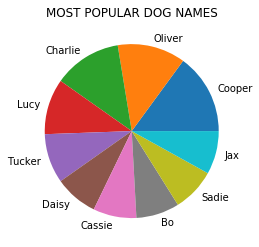

In [495]:
plt.pie(name_counts, labels=name_counts.index );
plt.title('MOST POPULAR DOG NAMES');

Cooper is the most popular dog name

Most Popular Dog Breeds

In [449]:
breed_count = df['predicted_breed'].value_counts()

In [458]:
breed_count

golden_retriever      174
Labrador_retriever    109
Pembroke              103
Chihuahua              85
pug                    62
                     ... 
Scotch_terrier          1
EntleBucher             1
groenendael             1
standard_schnauzer      1
Japanese_spaniel        1
Name: predicted_breed, Length: 111, dtype: int64

In [452]:
breed_count.sum()

1702

In [453]:
breed_count_proportions = breed_count/breed_count.sum()

In [462]:
popular_breeds = breed_count_proportions[0: 10]

In [463]:
popular_breeds

golden_retriever      0.102233
Labrador_retriever    0.064042
Pembroke              0.060517
Chihuahua             0.049941
pug                   0.036428
Pomeranian            0.028202
Samoyed               0.027027
chow                  0.025852
toy_poodle            0.024677
cocker_spaniel        0.018801
Name: predicted_breed, dtype: float64

In [464]:
type(popular_breeds)

pandas.core.series.Series

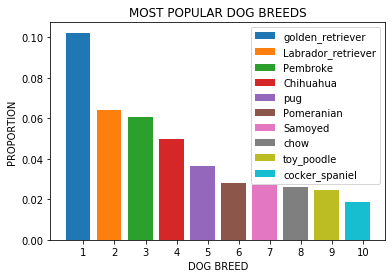

In [479]:
ind = np.arange(len(popular_breeds))
width = 0.35
plt.bar(0 , popular_breeds.values[0], label=popular_breeds.index[0]);
plt.bar(1, popular_breeds.values[1], label=popular_breeds.index[1]);
plt.bar(2, popular_breeds.values[2], label=popular_breeds.index[2]);
plt.bar(3, popular_breeds.values[3], label=popular_breeds.index[3]);
plt.bar(4, popular_breeds.values[4], label=popular_breeds.index[4]);
plt.bar(5, popular_breeds.values[5], label=popular_breeds.index[5]);
plt.bar(6, popular_breeds.values[6], label=popular_breeds.index[6]);
plt.bar(7, popular_breeds.values[7], label=popular_breeds.index[7]);
plt.bar(8, popular_breeds.values[8], label=popular_breeds.index[8]);
plt.bar(9, popular_breeds.values[9], label=popular_breeds.index[9]);
plt.ylabel('PROPORTION')
plt.xlabel('DOG BREED')
plt.title('MOST POPULAR DOG BREEDS')
locations = ind + width/2
labels = ind + 1
plt.xticks(locations, labels)
plt.legend();

Golden Retriever is the most popular dog breed

Dog type and favorite_count

In [480]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,predicted_breed,retweet_count,favorite_count,dog_type
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,Chihuahua,5865.0,31845.0,None
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,Chihuahua,3870.0,23989.0,None
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,basset,8729.0,38540.0,None
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10,None,Chesapeake_Bay_retriever,2899.0,19372.0,None
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,Appenzeller,1919.0,11298.0,None


In [484]:
df.groupby('dog_type').sum()['favorite_count']

dog_type
None       12309230.0
doggo       1144841.0
floofer       96857.0
pupper      1127697.0
puppo        452445.0
Name: favorite_count, dtype: float64

In [486]:
df.groupby('dog_type').count()['tweet_id']

dog_type
None       1465
doggo        58
floofer       8
pupper      151
puppo        20
Name: tweet_id, dtype: int64

In [488]:
avg_likes_per_dog_type = df.groupby('dog_type').sum()['favorite_count']/df.groupby('dog_type').count()['tweet_id']

In [489]:
avg_likes_per_dog_type

dog_type
None        8402.204778
doggo      19738.637931
floofer    12107.125000
pupper      7468.192053
puppo      22622.250000
dtype: float64

Text(0, 0.5, 'AVG. NO. OF LIKES')

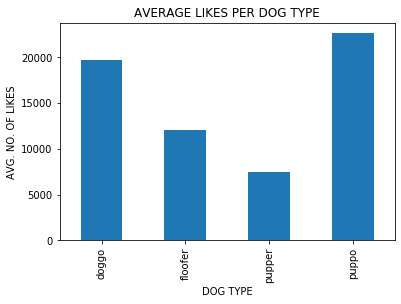

In [497]:
avg_likes_per_dog_type[1:].plot(kind='bar');
plt.title('AVERAGE LIKES PER DOG TYPE');
plt.xlabel('DOG TYPE')
plt.ylabel('AVG. NO. OF LIKES')

Thus, we can see that out of the four dog types, puppo received the maximum likes while pupper received the least